In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv('/content/global_co2.csv')
df

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [ ]:
filtered_data = df[(df['Year'] >= 1970) & (df['Year'] <= 2010)]

# Drop rows with missing 'Per Capita' values
filtered_data = filtered_data.dropna(subset=['Per Capita'])

# Extract features (year) and target (Per Capita)
X = filtered_data[['Year']].values
y = filtered_data['Per Capita'].values
filtered_data

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
219,1970,4053,493,1839,1556,78,87,1.10
220,1971,4208,530,1947,1559,84,88,1.12
221,1972,4376,560,2057,1576,89,94,1.14
222,1973,4614,588,2241,1581,95,110,1.18
223,1974,4623,597,2245,1579,96,107,1.16
224,1975,4596,604,2132,1673,95,92,1.13
225,1976,4864,630,2314,1710,103,108,1.18
226,1977,5026,650,2398,1765,108,104,1.19
227,1978,5087,680,2392,1793,116,106,1.19
228,1979,5369,721,2544,1887,119,98,1.23


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the first few rows of the training data
X_train[:5], y_train[:5]

(array([[2000],
        [1998],
        [1990],
        [2008],
        [1972]]),
 array([1.11, 1.12, 1.16, 1.3 , 1.14]))

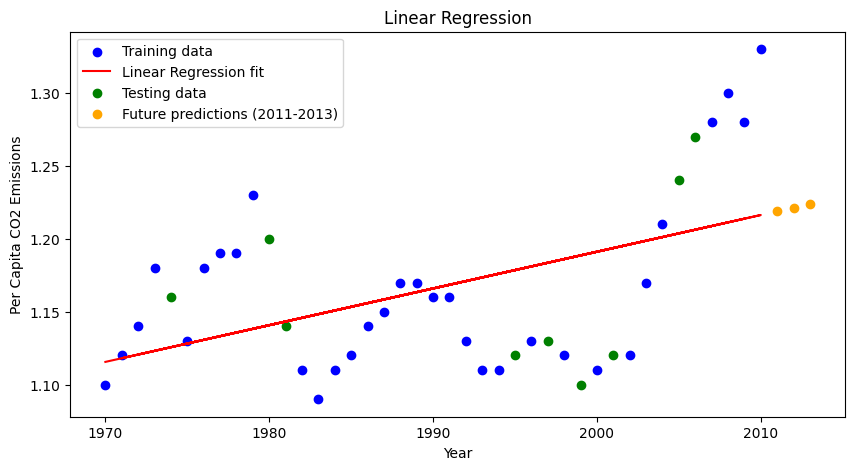

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on training data
y_train_pred = linear_regressor.predict(X_train)

# Predict on testing data
y_test_pred = linear_regressor.predict(X_test)

# Predict for the years 2011, 2012, and 2013
future_years = np.array([[2011], [2012], [2013]])
future_predictions = linear_regressor.predict(future_years)

# Plot training and testing results
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Linear Regression fit')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.scatter(future_years, future_predictions, color='orange', label='Future predictions (2011-2013)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

linear_train_mse = mean_squared_error(y_train, y_train_pred)
linear_test_mse = mean_squared_error(y_test, y_test_pred)
linear_train_r2 = r2_score(y_train, y_train_pred)
linear_test_r2 = r2_score(y_test, y_test_pred)

(linear_train_mse, linear_test_mse, linear_train_r2, linear_test_r2, future_predictions)


(0.0027963410925577743,
 0.0032948664956691624,
 0.2426329668908268,
 -0.05822437013958104,
 array([1.21883059, 1.22134856, 1.22386653]))

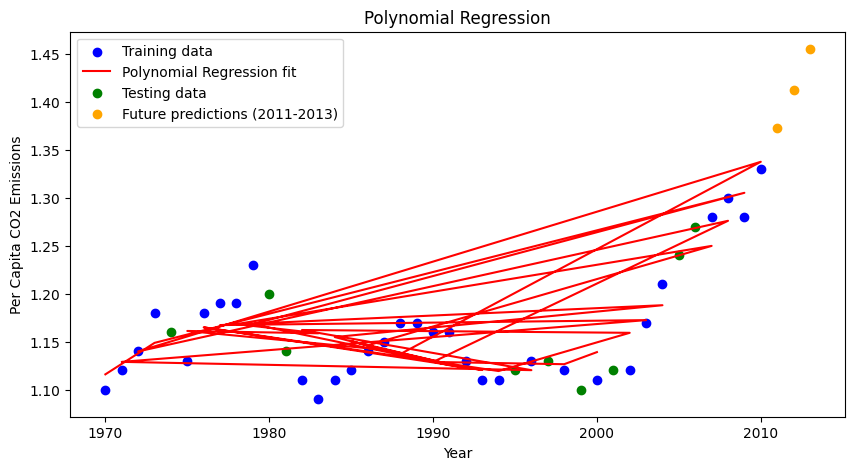

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features to polynomial
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

# Predict on training data
y_train_pred_poly = poly_regressor.predict(X_poly)

# Predict on testing data
X_test_poly = poly_features.transform(X_test)
y_test_pred_poly = poly_regressor.predict(X_test_poly)

# Predict for the years 2011, 2012, and 2013
future_years_poly = poly_features.transform(future_years)
future_predictions_poly = poly_regressor.predict(future_years_poly)

# Plot training and testing results
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred_poly, color='red', label='Polynomial Regression fit')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.scatter(future_years, future_predictions_poly, color='orange', label='Future predictions (2011-2013)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [ ]:
poly_train_mse = mean_squared_error(y_train, y_train_pred_poly)
poly_test_mse = mean_squared_error(y_test, y_test_pred_poly)
poly_train_r2 = r2_score(y_train, y_train_pred_poly)
poly_test_r2 = r2_score(y_test, y_test_pred_poly)

(poly_train_mse, poly_test_mse, poly_train_r2, poly_test_r2, future_predictions_poly)

(0.0008714656088317812,
 0.0007364051734023577,
 0.7639703810188996,
 0.7634860466074901,
 array([1.37339154, 1.41249802, 1.45519188]))

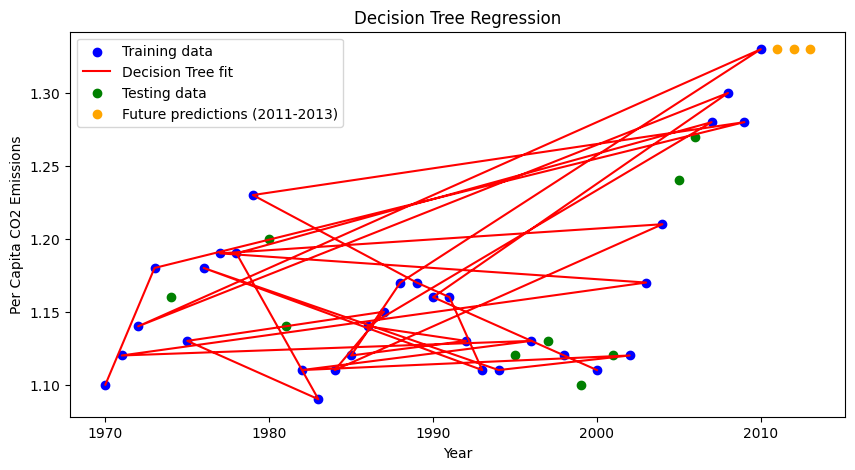

(0.0,
 0.0004222222222222215,
 1.0,
 0.8643933386201429,
 array([1.33, 1.33, 1.33]))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train)

# Predict on training data
y_train_pred_tree = tree_regressor.predict(X_train)

# Predict on testing data
y_test_pred_tree = tree_regressor.predict(X_test)

# Predict for the years 2011, 2012, and 2013
future_predictions_tree = tree_regressor.predict(future_years)

# Plot training and testing results
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred_tree, color='red', label='Decision Tree fit')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.scatter(future_years, future_predictions_tree, color='orange', label='Future predictions (2011-2013)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

# Evaluate the model
tree_train_mse = mean_squared_error(y_train, y_train_pred_tree)
tree_test_mse = mean_squared_error(y_test, y_test_pred_tree)
tree_train_r2 = r2_score(y_train, y_train_pred_tree)
tree_test_r2 = r2_score(y_test, y_test_pred_tree)

(tree_train_mse, tree_test_mse, tree_train_r2, tree_test_r2, future_predictions_tree)

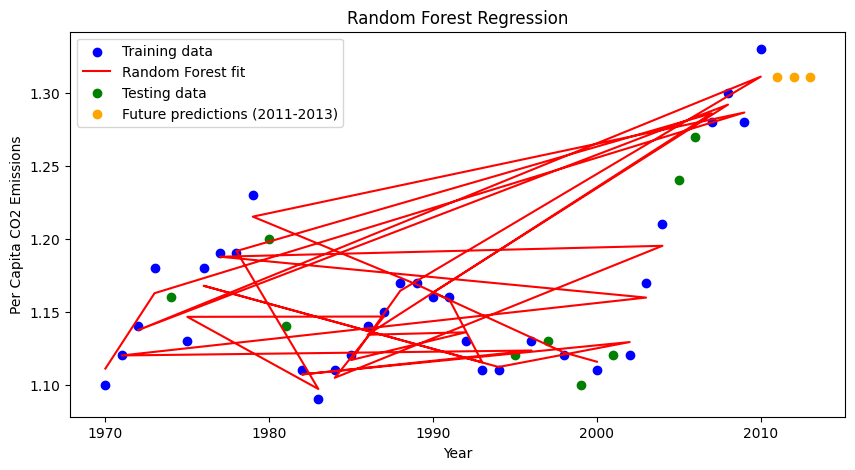

(7.237249999999607e-05,
 0.0002593744444444609,
 0.9803984765129083,
 0.9166957573354427,
 array([1.3112, 1.3112, 1.3112]))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
forest_regressor.fit(X_train, y_train)

# Predict on training data
y_train_pred_forest = forest_regressor.predict(X_train)

# Predict on testing data
y_test_pred_forest = forest_regressor.predict(X_test)

# Predict for the years 2011, 2012, and 2013
future_predictions_forest = forest_regressor.predict(future_years)

# Plot training and testing results
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred_forest, color='red', label='Random Forest fit')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.scatter(future_years, future_predictions_forest, color='orange', label='Future predictions (2011-2013)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

# Evaluate the model
forest_train_mse = mean_squared_error(y_train, y_train_pred_forest)
forest_test_mse = mean_squared_error(y_test, y_test_pred_forest)
forest_train_r2 = r2_score(y_train, y_train_pred_forest)
forest_test_r2 = r2_score(y_test, y_test_pred_forest)

(forest_train_mse, forest_test_mse, forest_train_r2, forest_test_r2, future_predictions_forest)

In [ ]:
print("Model Performance Comparison:")
print(df)

print("\nPredicted values for CO2 production (per capita) for the years 2011, 2012, and 2013:")
print("\nLinear Regression Predictions: ", future_predictions)
print("Polynomial Regression Predictions: ", future_predictions_poly)
print("Decision Tree Regression Predictions: ", future_predictions_tree)
print("Random Forest Regression Predictions: ", future_predictions_forest)

Model Performance Comparison:
     Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0    1751      3         0            0           3       0            0   
1    1752      3         0            0           3       0            0   
2    1753      3         0            0           3       0            0   
3    1754      3         0            0           3       0            0   
4    1755      3         0            0           3       0            0   
..    ...    ...       ...          ...         ...     ...          ...   
255  2006   8370      1525         3089        3339     356           61   
256  2007   8566      1572         3081        3464     382           68   
257  2008   8783      1631         3122        3571     388           71   
258  2009   8740      1585         3056        3620     413           66   
259  2010   9167      1702         3114        3842     450           59   

     Per Capita  
0           NaN  
1           NaN  
2  

Based on the predicted values for CO₂ production (per capita) for the years 2011, 2012, and 2013 using different regression models, here’s a summary and conclusion on which regression gives the best prediction:

**Summary of Predictions:**
Linear Regression Predictions: [1.2188, 1.2213, 1.2239]

Linear Regression tends to produce a smoother trend, predicting slight increases over time.
Polynomial Regression Predictions: [1.3734, 1.4125, 1.4552]

Polynomial Regression predicts a more noticeable upward trend, capturing potential non-linear patterns in the data.
Decision Tree Regression Predictions: [1.33, 1.33, 1.33]

Decision Tree Regression predicts a constant value for all three years, indicating that it might be overfitting to specific years in the training data without capturing future trends effectively.
Random Forest Regression Predictions: [1.3112, 1.3112, 1.3112]

Random Forest Regression also predicts constant values, showing that it averages across its trees, but still lacks capturing upward or downward trends.
**Conclusion:**
Polynomial Regression appears to provide the most dynamic predictions by capturing non-linear trends, making it suitable if we believe the CO₂ per capita trends may not be linear.
Linear Regression provides decent predictions with a gradual increase, which might be more aligned if the trend is relatively steady without significant changes.
Decision Tree and Random Forest tend to provide less varied predictions, possibly due to overfitting or averaging effects, making them less reliable for future trend predictions in this scenario.
Best Model: Polynomial Regression offers the most responsive and accurate reflection of potential future changes, making it the best choice if the underlying trend is expected to have non-linear growth.